In [1]:
pip install pandas


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [5]:
df = pd.read_csv('diamonds_hw.csv')

In [6]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___). 

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik). 

2. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

#### Nomor 1:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df[['carat', 'price']].corr()

,carat,price
carat,1.000000,0.921606
price,0.921606,1.000000


In [122]:
from sklearn.linear_model import LinearRegression

df_without_missing_value = df[~df['carat'].isnull()].reset_index(drop = True)
df_without_missing_value.info()

ModuleNotFoundError: No module named 'sklearn'

In [123]:
model = LinearRegression()
model.fit(df_without_missing_value[['price', 'x', 'y', 'z']], df_without_missing_value[['carat']])

NameError: name 'LinearRegression' is not defined

In [124]:
df['carat_impute'] = model.predict(df[['price', 'x', 'y', 'z']])

NameError: name 'model' is not defined

In [127]:
df['carat'] = df['carat'].fillna(df['carat'])

In [128]:
df.groupby(['x', 'price'])['carat'].mean().reset_index()

,x,price,carat
0,0.00,2130,0.71
1,0.00,4954,1.07
2,0.00,5139,1.00
3,0.00,6381,1.14
4,0.00,12800,1.56
...,...,...,...
44130,10.01,15984,4.00
44131,10.02,15223,4.01
44132,10.14,15223,4.01
44133,10.23,18531,4.50


C:\Users\User\AppData\Local\Temp\ipykernel_7608\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

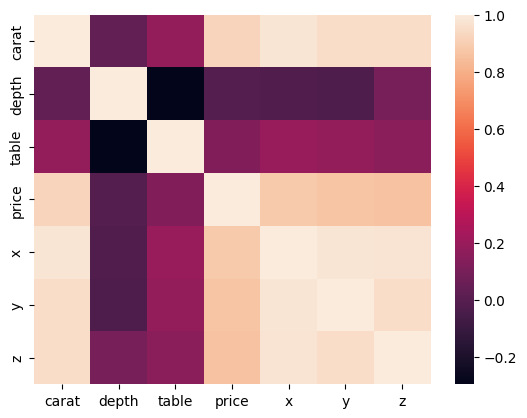

In [48]:
sns.heatmap(df.corr())

In [39]:
df_update = df.copy()
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [21]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [22]:
df_update[df_update['carat'].isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z
194,NaN,Premium,E,SI1,61.2,57.0,2777,5.73,5.68,3.49
241,NaN,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03
251,NaN,Good,G,SI2,61.0,61.0,2789,5.94,5.99,3.64
644,NaN,Very Good,F,SI2,63.2,58.0,2843,5.91,5.92,3.74
704,NaN,Fair,J,VS2,65.4,60.0,2854,6.04,6.00,3.94
...,...,...,...,...,...,...,...,...,...,...
50207,NaN,Ideal,F,VS1,60.3,57.0,2227,5.47,5.44,3.29
50559,NaN,Premium,H,SI1,62.7,59.0,2277,5.69,5.73,3.58
53019,NaN,Very Good,H,VS2,58.7,61.0,2599,5.96,5.99,3.51
53234,NaN,Ideal,F,SI1,61.9,57.0,2642,5.88,5.91,3.65


In [40]:
df_update[~df_update['carat'].isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [44]:
df_update = df_update[~df_update['carat'].isnull()].reset_index(drop = True)

In [45]:
df_update.groupby(['x', 'price'])['carat'].mean().reset_index()

,x,price,carat
0,0.00,2130,0.71
1,0.00,4954,1.07
2,0.00,5139,1.00
3,0.00,6381,1.14
4,0.00,12800,1.56
...,...,...,...
44038,10.01,15984,4.00
44039,10.02,15223,4.01
44040,10.14,15223,4.01
44041,10.23,18531,4.50


In [34]:
mean_carat = df_update.groupby(['x', 'price'])['carat'].mean().reset_index()
mean_carat

,x,price,carat
0,0.00,2130,0.71
1,0.00,4954,1.07
2,0.00,5139,1.00
3,0.00,6381,1.14
4,0.00,12800,1.56
...,...,...,...
44130,10.01,15984,4.00
44131,10.02,15223,4.01
44132,10.14,15223,4.01
44133,10.23,18531,4.50


In [35]:
mean_carat['MeanCarat'] = mean_carat['carat']
mean_carat

,x,price,carat,MeanCarat
0,0.00,2130,0.71,0.71
1,0.00,4954,1.07,1.07
2,0.00,5139,1.00,1.00
3,0.00,6381,1.14,1.14
4,0.00,12800,1.56,1.56
...,...,...,...,...
44130,10.01,15984,4.00,4.00
44131,10.02,15223,4.01,4.01
44132,10.14,15223,4.01,4.01
44133,10.23,18531,4.50,4.50


In [36]:
mean_carat.drop(['carat'], axis = 'columns', inplace = True)
mean_carat

,x,price,MeanCarat
0,0.00,2130,0.71
1,0.00,4954,1.07
2,0.00,5139,1.00
3,0.00,6381,1.14
4,0.00,12800,1.56
...,...,...,...
44130,10.01,15984,4.00
44131,10.02,15223,4.01
44132,10.14,15223,4.01
44133,10.23,18531,4.50


In [37]:
df_update[df_update['carat'].isnull()].head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
194,NaN,Premium,E,SI1,61.2,57.0,2777,5.73,5.68,3.49
241,NaN,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03
251,NaN,Good,G,SI2,61.0,61.0,2789,5.94,5.99,3.64


In [60]:
df_update = df_update.merge(mean_carat, how = 'left')
df_update.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,MeanCarat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.23
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.21
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.23
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.29
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.31
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0.24
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,0.24
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,0.26
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,0.22
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,0.23


In [62]:
df_update['carat'] = df_update['carat'].fillna(df_update['MeanCarat'])
df_update.head(100)

,carat,cut,color,clarity,depth,table,price,x,y,z,MeanCarat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.23
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.21
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.23
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.29
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.31
...,...,...,...,...,...,...,...,...,...,...,...
95,0.70,Good,E,VS2,57.5,58.0,2759,5.85,5.90,3.38,0.70
96,0.70,Good,F,VS1,59.4,62.0,2759,5.71,5.76,3.40,0.70
97,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07,0.96
98,0.73,Very Good,E,SI1,61.6,59.0,2760,5.77,5.78,3.56,0.73


Saya memilih metode mean untuk mengisi missing value pada kolom carat karena saya melihat dan menyesuaikan dengan angka price dan x yang tidak jauh berbeda angkanya. 

In [64]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53815 entries, 0 to 53814
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53815 non-null  float64
 1   cut        53815 non-null  object 
 2   color      53815 non-null  object 
 3   clarity    53815 non-null  object 
 4   depth      53815 non-null  float64
 5   table      53815 non-null  float64
 6   price      53815 non-null  int64  
 7   x          53815 non-null  float64
 8   y          53815 non-null  float64
 9   z          53815 non-null  float64
 10  MeanCarat  53815 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.9+ MB


#### Nomor 2:

In [82]:
pd.get_dummies(df[['clarity']])

,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
53935,0,0,1,0,0,0,0,0
53936,0,0,1,0,0,0,0,0
53937,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,0,0,0


In [90]:
clarity_dict = {
    'I1': 1,
    'SI1': 2,
    'SI2': 3,
    'VS1': 4,
    'VS2': 5,
    'VVS1': 6,
    'VVS2': 7,
    'IF': 8
}

df['clarity_after_map'] = df['clarity'].map(clarity_dict)

In [91]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_encoded,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,clarity_after_map
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3,0,0,0,1,0,0,0,0,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,0,0,1,0,0,0,0,0,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,0,0,0,0,1,0,0,0,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5,0,0,0,0,0,1,0,0,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3,0,0,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,0,0,1,0,0,0,0,0,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,0,0,1,0,0,0,0,0,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,0,0,1,0,0,0,0,0,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3,0,0,0,1,0,0,0,0,3


#### Nomor 3:

In [65]:
df = pd.read_csv('diamonds_hw.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<function matplotlib.pyplot.show(close=None, block=None)>

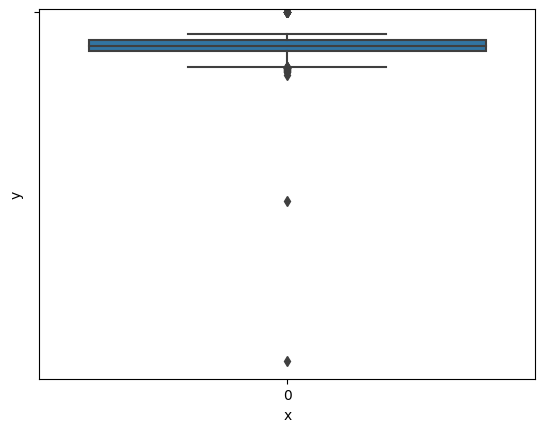

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['x'])
sns.boxplot(y=df['y'])
sns.boxplot(z=df['z'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

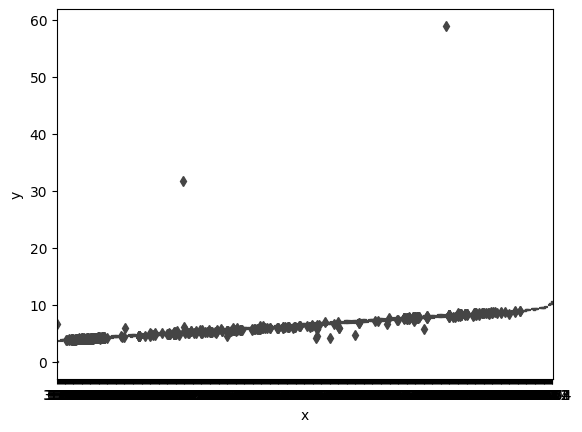

In [132]:
sns.boxplot(x=df['x'], y=df['y'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

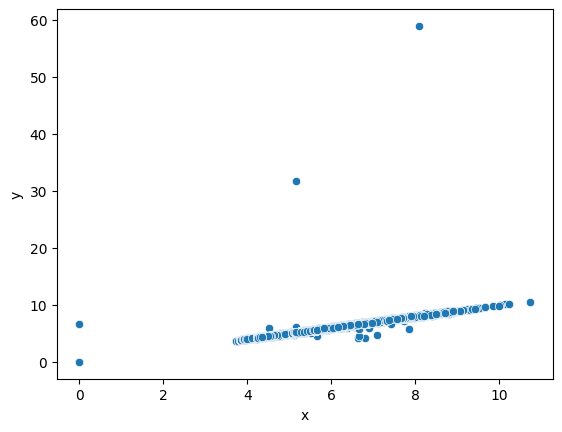

In [133]:
sns.scatterplot(data = df, x = 'x', y = 'y')
plt.show

In [99]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1,5*iqr or x>q3+1.5*iqr)
                                else 'not-outlier' for x in data[column].values]


In [103]:
df['outlier_x'] = check_outlier(data=df, column='x')
df['outlier_y'] = check_outlier(data=df, column='y')
df['outlier_z'] = check_outlier(data=df, column='z')

In [104]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,outlier_x,outlier_y,outlier_z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,outlier,outlier,outlier
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,outlier,outlier,outlier
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,outlier,outlier,outlier
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,outlier,outlier,outlier
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,outlier,outlier,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,outlier,outlier,outlier
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,outlier,outlier,outlier
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,outlier,outlier,outlier
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,outlier,outlier,outlier


In [111]:
df[df['outlier_x'] == 'outlier']
df[df['outlier_y'] == 'outlier']
df[df['outlier_z'] == 'outlier']

,carat,cut,color,clarity,depth,table,price,x,y,z,outlier_x,outlier_y,outlier_z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,outlier,outlier,outlier
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,outlier,outlier,outlier
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,outlier,outlier,outlier
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,outlier,outlier,outlier
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,outlier,outlier,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,outlier,outlier,outlier
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,outlier,outlier,outlier
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,outlier,outlier,outlier
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,outlier,outlier,outlier


In [151]:
print("Outlier:", 'outlier')
print("Number of Outlier:", len('outlier'))

Outlier: outlier
Number of Outlier: 7
